In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv('./weather.csv')

##removing unnecessary columns
data_frame = data_frame.drop(['Formatted Date','Precip Type','Summary','Daily Summary'],axis=1)
data_frame.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [6]:
#drop duplicate columns
duplicate_rows = data_frame[data_frame.duplicated()]
print(duplicate_rows.shape)
data_frame = data_frame.drop_duplicates()

(73, 8)


In [7]:
#remove null values
print(data_frame.isnull().sum())
data_frame = data_frame.dropna()
print(data_frame.isnull().sum())

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64


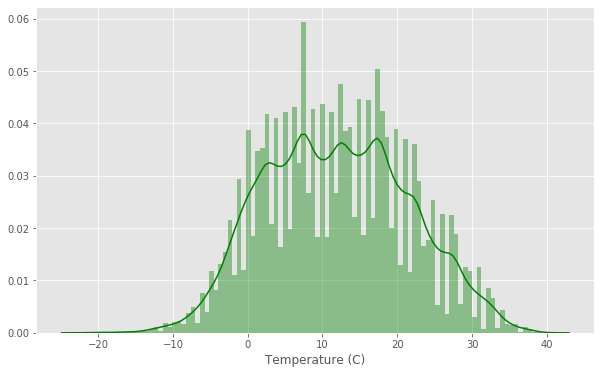

In [8]:
#plot graph for temp outliers
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
# plt.scatter(data_frame['Temperature (C)'],data_frame['Humidity'])
# sns.boxplot(x=data_frame['Humidity'])
sns.distplot(data_frame['Temperature (C)'], bins=100, hist_kws={'alpha': 0.4},color='g');

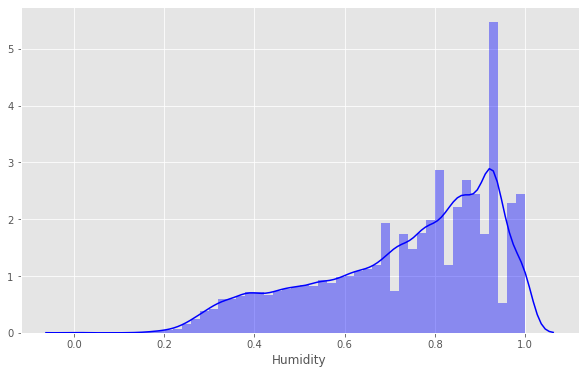

In [9]:
#plot graph for temp outliers
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
# plt.scatter(data_frame['Temperature (C)'],data_frame['Humidity'])
# sns.boxplot(x=data_frame['Humidity'])
sns.distplot(data_frame['Humidity'],color='b');

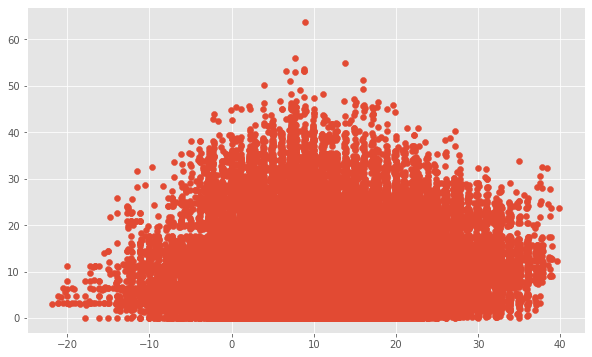

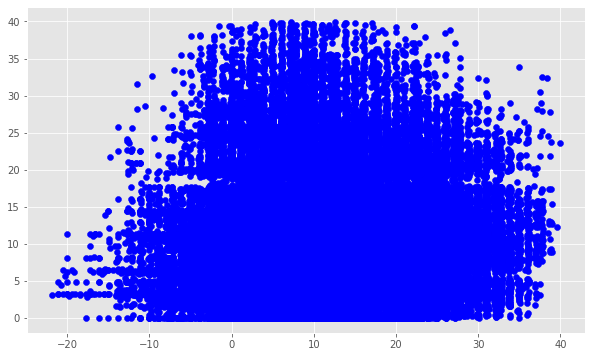

In [10]:
#2nd plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(data_frame['Temperature (C)'],data_frame['Wind Speed (km/h)'])
plt.show()
filter_data = data_frame[(data_frame['Temperature (C)'] < 30)]
filter_data = data_frame[(data_frame['Wind Speed (km/h)'] < 40)]
plt1.scatter(filter_data['Temperature (C)'],filter_data['Wind Speed (km/h)'],color='b')
plt1.show()

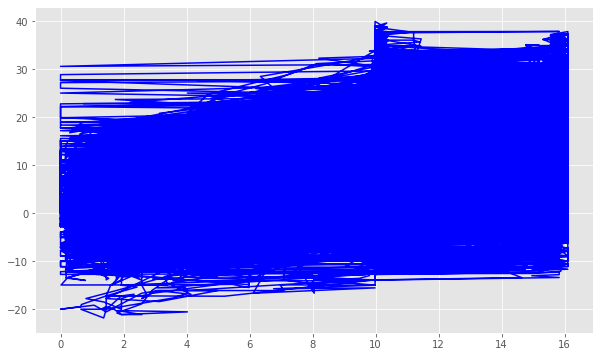

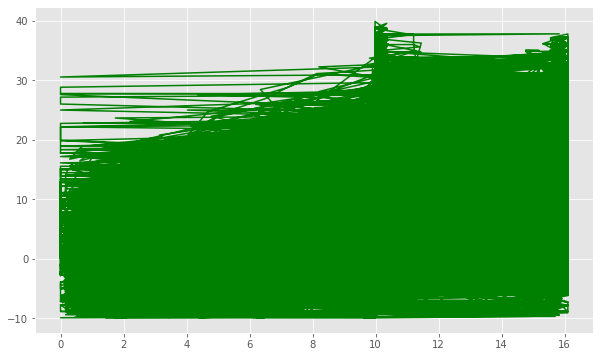

In [18]:
#2nd plot
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
fig, ax = plt3.subplots(figsize=(10,6))
plt3.plot(data_frame['Visibility (km)'],data_frame['Temperature (C)'],c='b')
plt3.show()
filter_data1 = data_frame[(data_frame['Temperature (C)'] > -10)]
# filter_data1 = data_frame[(data_frame['Wind Speed (km/h)'] < 40)]
plt4.plot(filter_data1['Visibility (km)'],filter_data1['Temperature (C)'],color='g')
plt4.show()

In [7]:
#Rcorrelation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

numeric_features  = data_frame.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['Temperature (C)'].sort_values(ascending=False)[:5],'\n')

Temperature (C)             1.000000
Apparent Temperature (C)    0.992630
Visibility (km)             0.392413
Wind Bearing (degrees)      0.029754
Wind Speed (km/h)           0.008731
Name: Temperature (C), dtype: float64 



In [8]:
##Regression model
from sklearn.preprocessing import LabelEncoder


n_features = data_frame.select_dtypes(include=[np.number])


#delete null values
nulls = pd.DataFrame(data_frame.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
print("\n")


# ##handling missing value
data_frame = data_frame.select_dtypes(include=[np.number]).interpolate().dropna()
print("missing values: " + str(sum(data_frame.isnull().sum() != 0))+ "\n")


X = data_frame.drop(["Temperature (C)"],axis=1)
y = data_frame["Temperature (C)"]


X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=0.4)


l_model = linear_model.LinearRegression()
model = l_model.fit(X_train, y_train)
print ("R2 score: ", model.score(X_test, y_test))


prdc = model.predict(X_test)
print ('RMSE score: ', mean_squared_error(y_test, prdc))

                          Null Count
Feature                             
Pressure (millibars)               0
Loud Cover                         0
Visibility (km)                    0
Wind Bearing (degrees)             0
Wind Speed (km/h)                  0
Humidity                           0
Apparent Temperature (C)           0
Temperature (C)                    0


missing values: 0

R2 score:  0.9901112877065714
RMSE score:  0.9033461263374988
